In [63]:
import pandas as pd
from IPython import get_ipython
from matplotlib import pyplot as plt
from numpy import longdouble
from scipy.optimize import curve_fit

from model import CalculateFeatures
from model.utils import minimum_year_analysis, b_slope_analysis
import numpy as np
pdf = pd.DataFrame

%matplotlib qt
# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

import model

In [64]:
USE_CACHED_FEATURES=True
MAGNITUDE_THRESHOLD=6.0
WINDOW_SIZE=100

In [189]:
df = model.load_data('../../data/DATA_2.csv')

C:\Users\fof\miniconda3\envs\SeismicPrediction\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


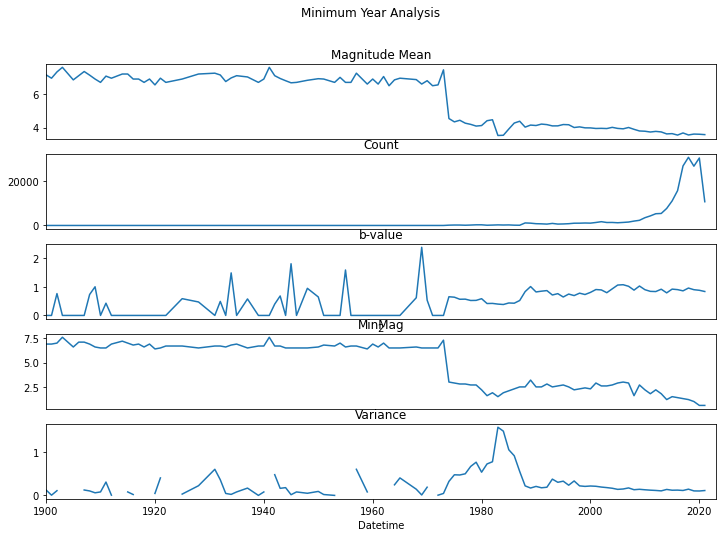

In [190]:
%matplotlib inline
minimum_year_analysis(df, [],[1900,2023])

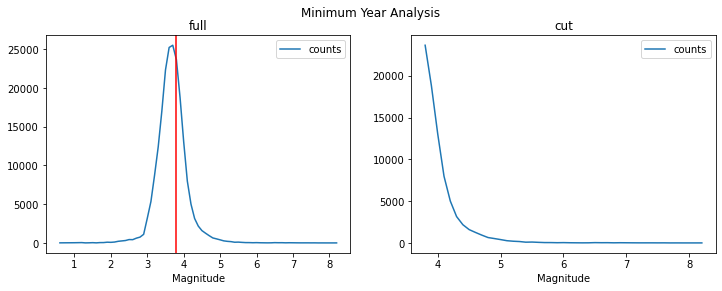

In [191]:
%matplotlib inline
b_slope_analysis(df, 3.8)

In [192]:
df =  df[df.Datetime.dt.year >= 1974]

In [193]:
df1 = df
df2 = df[df.Magnitude >= 3.8]

In [194]:
unique, counts = np.unique(df2.Magnitude, return_counts=True)
view = np.flip(counts, 0)
np.cumsum(view, 0, out=view)

unique2, counts2 = np.unique(df1.Magnitude, return_counts=True)
view = np.flip(counts2, 0)
np.cumsum(view, 0, out=view)

array([     1,      2,      3,      6,      8,     11,     15,     19,
           24,     29,     34,     41,     47,     60,     80,     92,
          101,    116,    138,    175,    201,    242,    285,    355,
          459,    548,    715,    919,   1185,   1584,   2108,   2752,
         3689,   4944,   6536,   8713,  11865,  16877,  24853,  37895,
        56671,  80318, 105829, 131053, 153374, 170395, 182787, 191531,
       196875, 200058, 201166, 201915, 202530, 202951, 203384, 203693,
       203952, 204160, 204273, 204349, 204443, 204489, 204531, 204540,
       204573, 204588, 204593, 204635, 204660, 204670], dtype=int64)

In [195]:
a,b=model.CalculateFeatures.gutenberg_richter_curve_fit(df2.Magnitude)
a,b

(8.325987406538326, 0.9979022272888937)

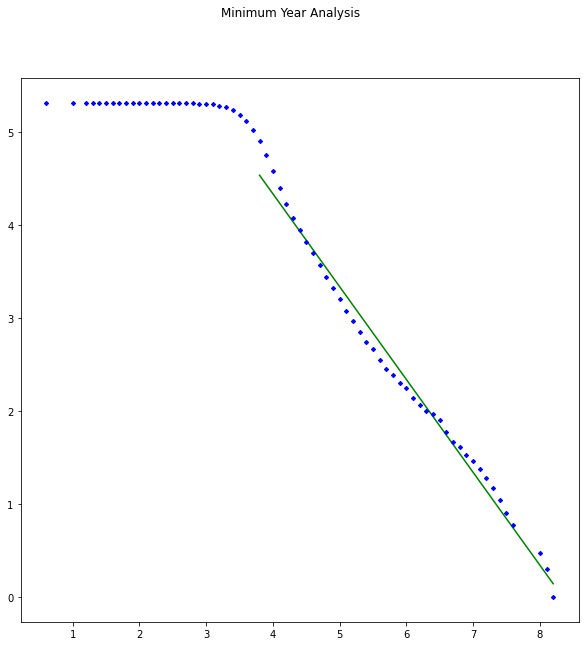

In [196]:
y = np.array(list(map(lambda x : model.CalculateFeatures.log_gutenberg_richter_law(x,a,b),unique)))

%matplotlib inline
fig, axes = plt.subplots()
fig.suptitle('Minimum Year Analysis')
fig.set_size_inches(10, 10)
axes.plot(unique,y,"g")
axes.plot(unique2,np.log10(counts2.astype(longdouble),dtype=longdouble),"bD",markersize=3)
plt.show()